In [1]:
from tools.data_reader import *
from tools.neural_network_integrator import *
from tools.visualization import *
from tools.eulers_method import *
from models.nn import *


%reload_ext autoreload
%autoreload 2

### NN with four sources


In [2]:
# data prepocessing
file_path = "data/postvis_1000.traj"
columns, df_selected, train_data, val_data = data_reader(
    file_path, train_percentage=0.9, test_percentage=0.1
)
train_data.shape, val_data.shape, train_data[0, :, :]

startX-PID1     18.031682
endX-PID1       18.428388
simTime         10.953929
startY-PID1      8.393541
endY-PID1        8.563558
endTime-PID1    11.433424
Name: 9410, dtype: float64


((165064, 2, 3),
 (18341, 2, 3),
 array([[18.03168153, 18.42838828, 10.95392944],
        [ 8.39354064,  8.56355782, 11.43342357]]))

[0. 0. 0. ... 0. 0. 0.]


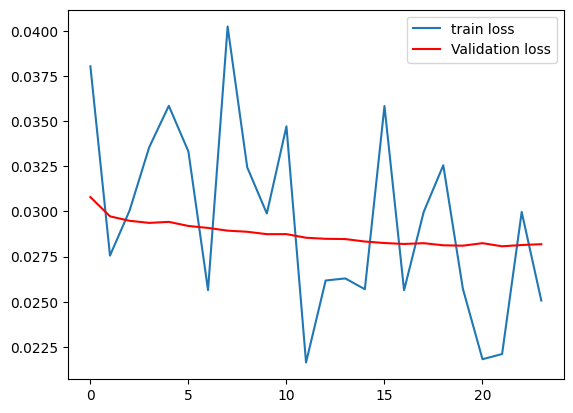

In [3]:
# parameters of neural network
lr = 0.0005
epochs = 30
batch_size = 128
width = 3
# initalize the model
model = Neural_network(width=width)
# train the model
train_loss_data, val_loss_data = train(
    model,
    lr,
    epochs,
    train_data,
    val_data,
    batch_size,
    early_stopping_step=1,
    method="euler",
)
plot_train_val_loss(train_loss_data, val_loss_data)
print(val_loss_data)

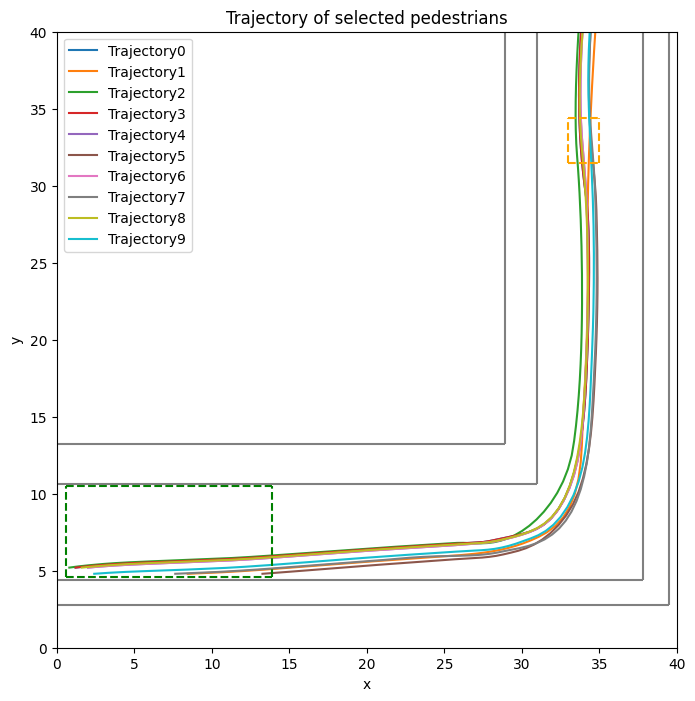

In [4]:
# simluate the trajectory
T_end = 450
num_selected_peds = 10
maximun_num_pedestrians = 40

traj = simulateRandomEuler(
    num_selected_peds, maximun_num_pedestrians, T_end, model, file_path
)
plot_traj(num_selected_peds, traj, background="corner")

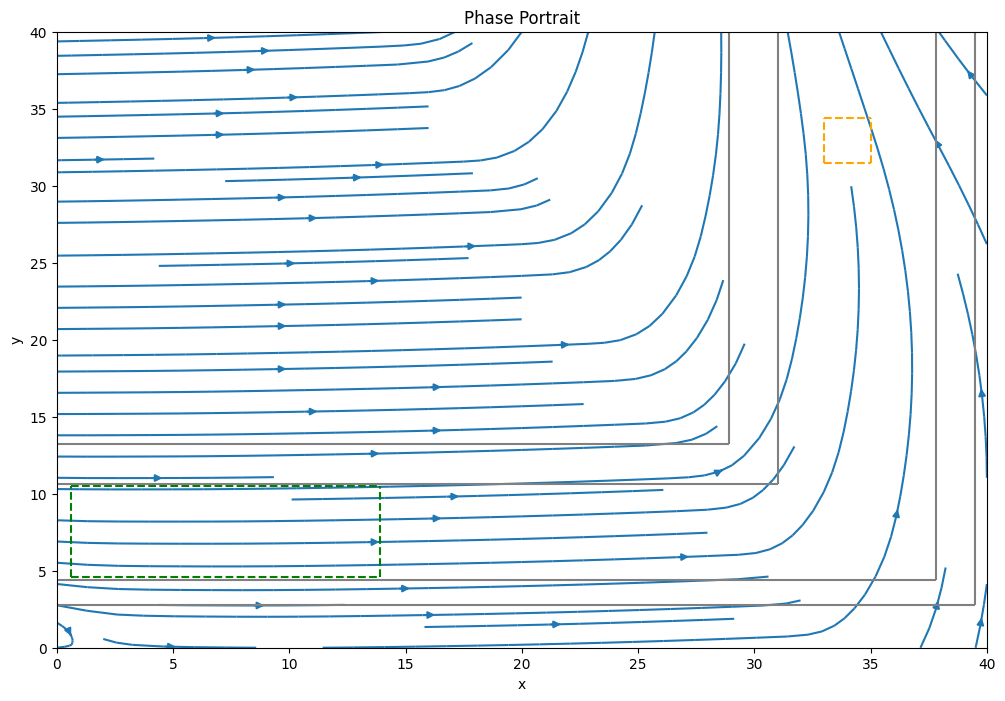

In [5]:
# plot the phase portrait
X, Y, U, V = phase_portrait(model)
plot_phase_portrait(X, Y, U, V, background="corner")

## Bifurcation

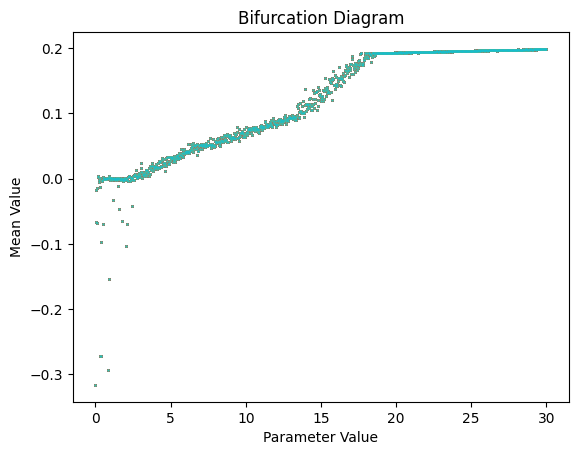

In [9]:
#generate a range of parameter values
parameter_values = np.linspace(0, 30, num=1000)
x_mean_list = []
input_size = model.layer1.in_features

for param_value in parameter_values:
    #create a random latent vector
    latent_vector = torch.randn(1, input_size)  
    latent_vector[0, 0] = param_value
    with torch.no_grad():
        reconstructed_output = model(latent_vector)
    
    #calculate the mean value of output
    x_mean = reconstructed_output.squeeze().mean(dim=0).detach().numpy()
    x_mean_list.append(x_mean)

parameter_values = np.array(parameter_values)
x_mean_array = np.array(x_mean_list)

parameter_values = np.tile(parameter_values, (x_mean_array.shape[0], 1))

#plot the bifurcation diagram
plt.figure()
plt.plot(parameter_values.T, x_mean_array, '.', markersize=1)
plt.xlabel('Parameter Value')
plt.ylabel('Mean Value')
plt.title('Bifurcation Diagram')
plt.show()
